In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd

In [3]:
sys.path.insert(1, '../src')
from plant import Plant
from sun import Sun
from state import State
from run import *
plt.rcParams['figure.figsize'] = [20, 10]

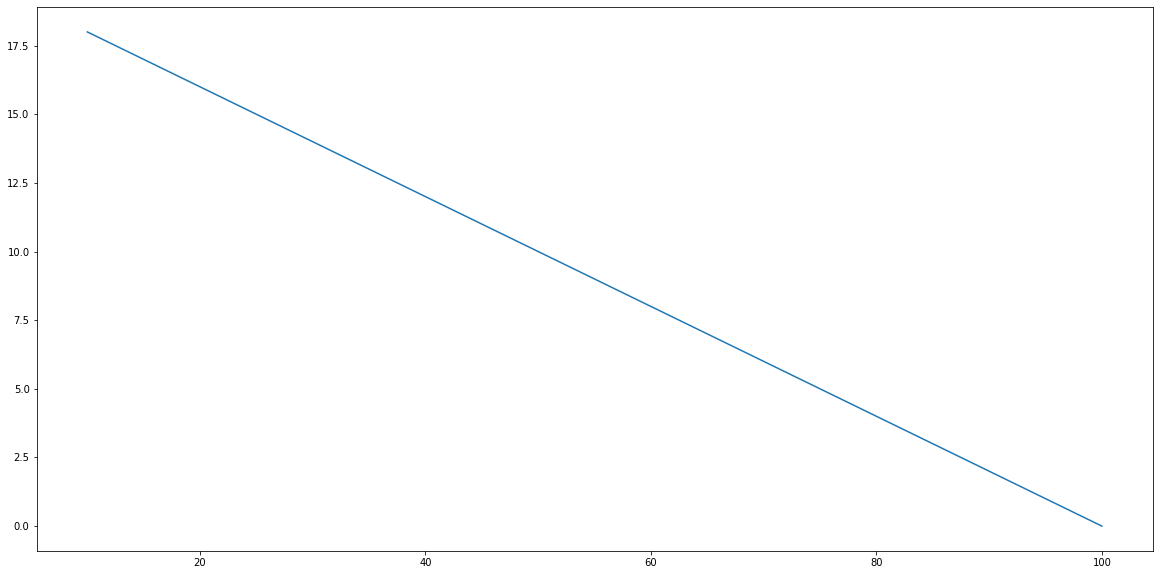

In [4]:
xs = np.linspace(10, 100, 20)
ys = list(map(lambda x: -x/5 + 20, xs))
plt.plot(xs, ys);

# Hypothetical Plant with Basic Layouts

In [5]:
plant = Plant(heli_layout_file_name="../data/layouts/theater-layout-flipped.json")
print(plant)

Hypothetical Plant: 

	- field area:
		- [x_min, x_max] = [0.00, 100.00]
		- [y_min, y_max] = [0.00, 20.00]
		- diameter = 101.98
		- max_ij = 91.78

	- receiver: 
		- _height = 50.00
		- _angle = 80.00
		- _size = 5.00

	- heliostats:
		- number of heliostats n = 20.00
		- heli_size = 3.00
		- heli_rays = 5.00
		- heli_layout = theater-layout-flipped 



In [6]:
plant.check_layout()

True

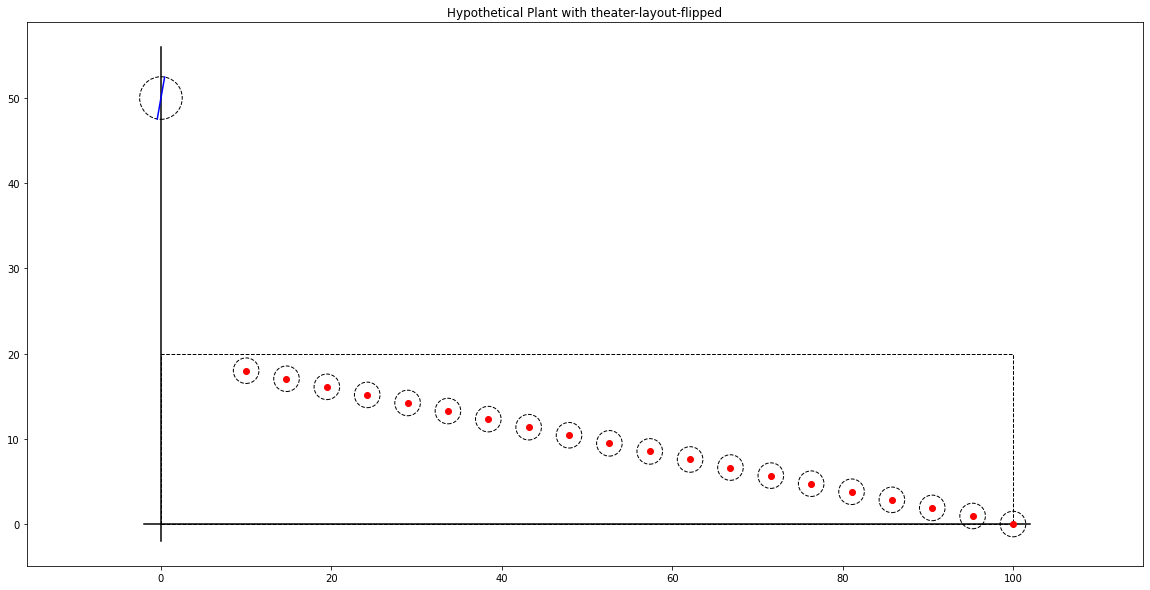

In [7]:
plant.draw()

Effects on heliostat 10: 

	* eta_aa = 0.989289
	* eta_cos = 0.859870
	* eta_sbm = 0.000000
	* received_rays / all_rays = 0 / 5
	* [not-shaded, not-blocked, not-missed] / all_rays = [0 3 5] / 5



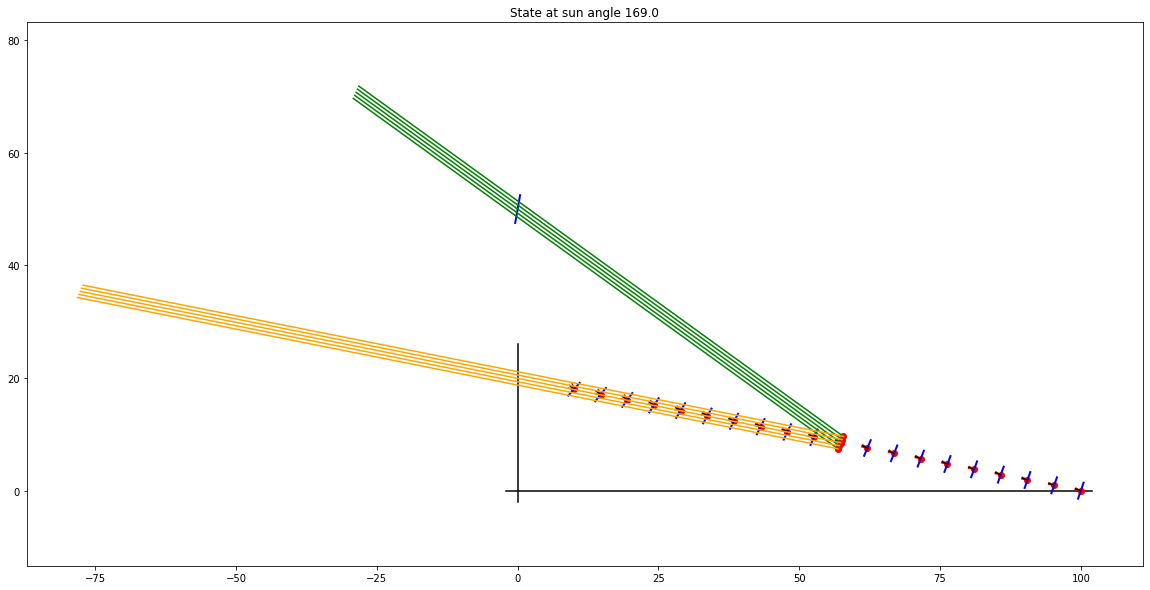

In [8]:
sun = Sun()
state = State(plant, sun_angle=sun.angles[15])
effects = state.get_effects(i=10, verbose=True)
state.draw(i=10)

In [9]:
energy, stats_df, powers = get_energy(plant, show_stats=True)

Hypothetical Plant with theater-layout-flipped

	- energy = 209.70197204621297260019

	         mu_aa   mu_cos  mu_sbm
	- etas:  0.9893, 0.8781, 0.7182

	         pi_sha  pi_blo  pi_mis
	- sbms:  0.1582, 0.1706, 0.0071



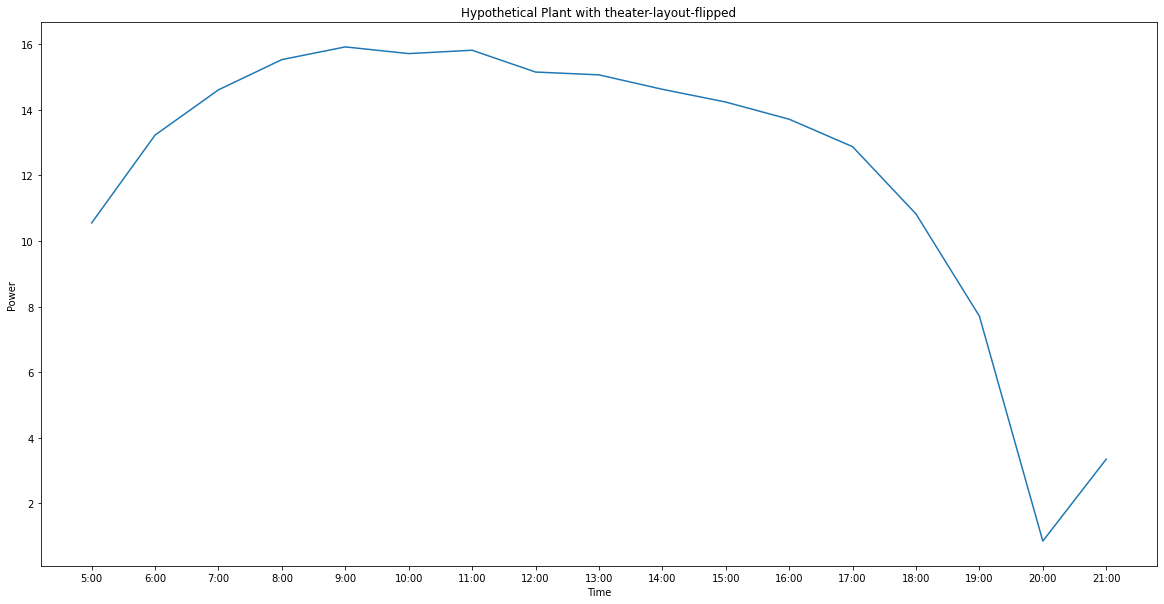

In [10]:
draw(plant, powers)

In [11]:
stats_df

,time,power,mu_aa,mu_cos,mu_sbm,pi_sha,pi_blo,pi_mis
0,5:00,10.547860,0.989289,0.592336,0.90,0.10,0.00,0.00
1,6:00,13.225924,0.989289,0.668456,1.00,0.00,0.00,0.00
2,7:00,14.604630,0.989289,0.738137,1.00,0.00,0.00,0.00
3,8:00,15.525832,0.989289,0.800710,0.98,0.00,0.02,0.00
4,9:00,15.912478,0.989289,0.855572,0.94,0.00,0.06,0.00
5,10:00,15.708548,0.989289,0.902194,0.88,0.00,0.12,0.00
6,11:00,15.810991,0.989289,0.940128,0.85,0.00,0.15,0.00
7,12:00,15.146330,0.989289,0.969007,0.79,0.00,0.19,0.02
8,13:00,15.060685,0.989289,0.988554,0.77,0.00,0.21,0.02
9,14:00,14.620717,0.989289,0.998582,0.74,0.00,0.24,0.02
